# Математическая статистика
## Практическое задание 2

В данном задании рассматриваются различные свойства оценок, методы получения оценок, способы сравнения оценок.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла done
* Задача 2 - 3 балла done
* Задача 3 - 3 балла done
* Задача 4 - 2 балла done
* Задача 5 - 2 балла done
* Задача 6 - 3 балла done
* Задача 7а - 3 балла done
* Задача 7b<font size="5" color="red">\*</font> - 5 баллов done
* Задача 8 - 4 балла done
* Задача 9<font size="5" color="red">\*</font> - 4 балла done
* Задача 10<font size="5" color="red">\*</font> - 5 баллов done


При выполнении задания рекомендуется пользоваться библиотекой `scipy.stats`. Подробное описание есть в наших инструкциях.

**Задача 1.** В этой задаче нужно визуализировать свойство несмещенности.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что в качестве оценки параметра $\theta$ можно использовать следующие оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** $\frac{n+1}{n}X_{(n)}$ и $2\overline{X}$

Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра.

Сгенерируйте 500 выборок $X_1^j, ..., X_n^j$ из распределения $U[0, 1]$, по каждой из них посчитайте оценку $\widehat{\theta}_j$, получив тем самым 500 независимых оценок параметра. Нанесите их на график с одинаковой *у*-координатой. Отметьте специальным символом среднее этих выборок (см. шаблон ниже). Выполните данную процедуру для $n \in \{10, 100, 500\}$.

Для нанесения точек на график используйте следующий шаблон. Для каждой оценки выставите разный *уровень*, чтобы реализации разных оценок не слипались. В качестве *метки* используйте latex-код этой оценки, который можно взять выше в условии этой задачи. Постарайтесь не размножать код, а сделать циклы по типам оценок и по размеру выборки. Естественно, все типы оценок должны быть на одном графике, но для разных $n$ должны быть разные графики.

In [1218]:
import numpy as np
import scipy.stats as sps
import matplotlib
import scipy as sp
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook, tqdm
import random
%matplotlib inline

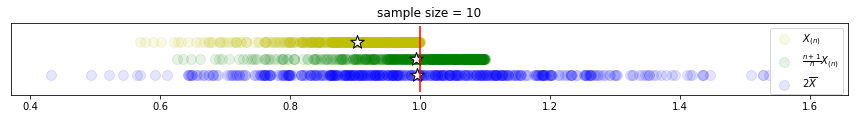

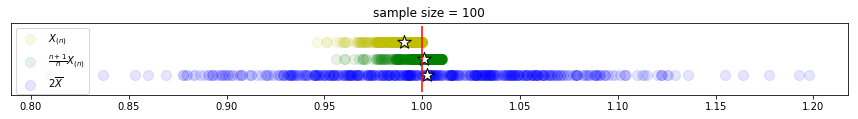

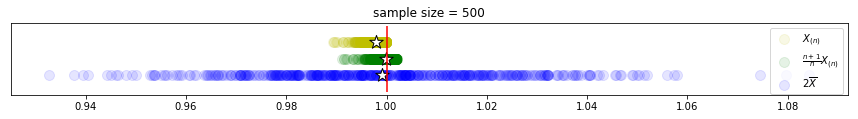

In [1291]:
cnt_samples = 500
n_arr = [10, 100, 500]
estimators = [
    (lambda X: np.max(X, axis=1), '$X_{(n)}$', 0, 'y'),
    (lambda X: (X.shape[1] + 1)/X.shape[1] * np.max(X, axis=1), 
     '$\\frac{n+1}{n}X_{(n)}$', -1, 'g'),
    (lambda X: 2 * np.mean(X, axis=1), '$2\overline{X}$', -2, 'b')
]
for i, n in enumerate(n_arr):
    plt.figure(figsize=(15, 4.5))
    samples = sps.uniform.rvs(size=(cnt_samples, n))
    plt.subplot(3, 1, i + 1)
    for func, label, level, color in estimators:
        plt.scatter(func(samples), np.zeros_like(samples[:, 0]) + level, 
                    alpha=0.1, s=100, color=color, label=label)
        plt.scatter(func(samples).mean(), level, marker='*', s=200, 
                    color='w', edgecolors='black')
    plt.vlines(1, -len(estimators), 1, color='r')
    plt.title('sample size = %d' % n)
    plt.yticks([])
    plt.legend(loc='best')
plt.show()

Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** $\frac{n}{n-1}S^2$

Для данной модели выполните те же действия, что и с предыдущей.

Выполняю задание для $\sigma^2 = 1$

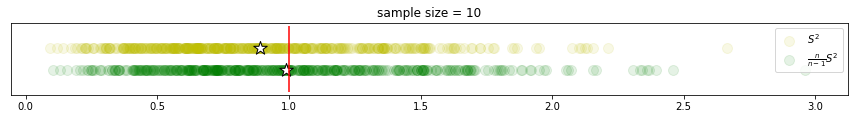

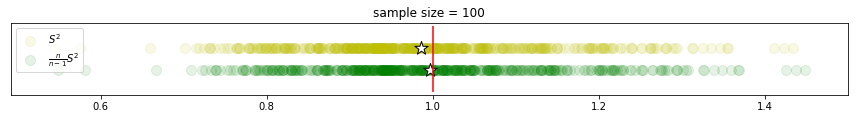

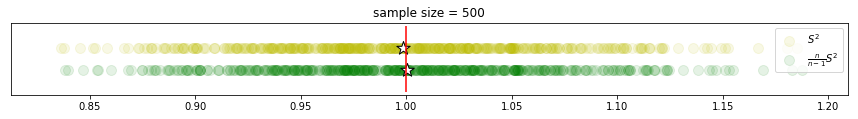

In [1293]:
cnt_samples = 500
n_arr = [10, 100, 500]
estimators = [
    (lambda X: np.mean((X**2), axis=1) - np.mean(X, axis=1)**2, '$S^2$', 0, 'y'),
    (lambda X: n / (n - 1) * (np.mean((X**2), axis=1) - np.mean(X, axis=1)**2), 
     '$\\frac{n}{n-1}S^2$', -1, 'g')
]
for i, n in enumerate(n_arr):
    plt.figure(figsize=(15, 4.5))
    samples = sps.norm.rvs(size=(cnt_samples, n))
    plt.subplot(3, 1, i + 1)
    for func, label, level, color in estimators:
        plt.scatter(func(samples), np.zeros_like(samples[:, 0]) + level, 
                    alpha=0.1, s=100, color=color, label=label)
        plt.scatter(func(samples).mean(), level, marker='*', s=200, 
                    color='w', edgecolors='black')
    plt.vlines(1, -len(estimators), 1, color='r')
    plt.title('sample size = %d' % n)
    plt.yticks([])
    plt.legend(loc='best')
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** Из графиков подтвердили, что оценка параметра называется несмещенной, если ее матожидание совпадание с этим параметром для любого из возможных значений параметра.

Т.к физики чутка шарят в статистику, то они поняли, что для того, чтобы померить не очень большое количество измерений лучше брать $\frac{1}{n-1}$, ибо как раз при таком значении выборочная дисперсия является несмещенной оценкой дисперсии


**Задача 2.** В этой задаче нужно визуализировать свойство состоятельности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является состоятельной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. При написании кода может помочь вступительное задание.

Для каждого $j$ нанесите на один график зависимость $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Поскольку при малых $n$ значения оценок могут быть большими, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что $X_{(n)}$ является состоятельной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*, сгенерировав выборки из распределения $U[0, 1]$ и посчитав оценки $\widehat{\theta}_{jn} = \max\limits_{i=1...n}X_i^j$.

Сделайте вывод о том, что такое свойство состоятельности. Подтверждают ли сделанные эксперименты свойство состоятельности данных оценок? Как связаны результаты в пункте *a)* с законом больших чисел?

a)

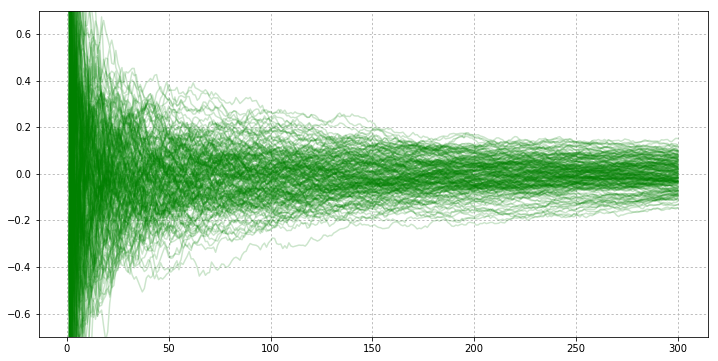

In [1221]:
cnt_samples = 200
n = 300
samples = sps.norm.rvs(size=(cnt_samples, n))
theta_jn = np.cumsum(samples, axis=1) / np.arange(1, n + 1)
plt.figure(figsize=(12, 6))
for j in range(cnt_samples):
    plt.plot(np.arange(1, n + 1), theta_jn[j], alpha=0.2, color='g')
plt.ylim((-0.7, 0.7))
plt.grid(ls=':')
plt.show()

б)

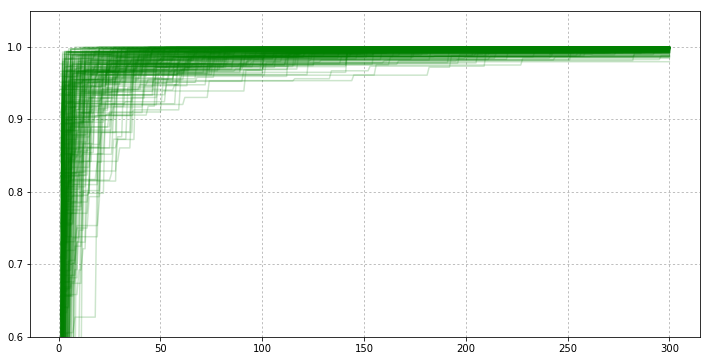

In [1281]:
cnt_samples = 200
n = 300
samples = sps.uniform.rvs(size=(cnt_samples, n))
theta_jn = np.maximum.accumulate(samples, axis=1)
plt.figure(figsize=(12, 6))
for j in range(cnt_samples):
    plt.plot(np.arange(1, n + 1), theta_jn[j], alpha=0.2, color='g')
plt.ylim((0.6, 1.05))
plt.grid(ls=':')
plt.show()

**Вывод:** Оценка $\theta^*(X)$ называется **состоятельной** оценкой параметра $\tau(\theta)$ если для $\forall \ \theta \in \Theta $ выполнено $\theta^*(X) \xrightarrow{{\sf P}_\theta } \tau(\theta)$. Это и видно из графичков для данных оценок: при увеличении размера выборки разность $| \theta^*(X) - \theta | \rightarrow 0$

Теперь об оценке в пункте а). Она является состоятельной по ЗБЧ:
при $\delta = \frac{1}{2}$ получаем $\overline{X} \xrightarrow{{\sf P}} 0$

**Задача 3.** В этой задаче нужно визуализировать свойство асимптотической нормальности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. Для этой оценки посчитайте статистику $T_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 0$.

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Pois(\theta)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*.

Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?

a)

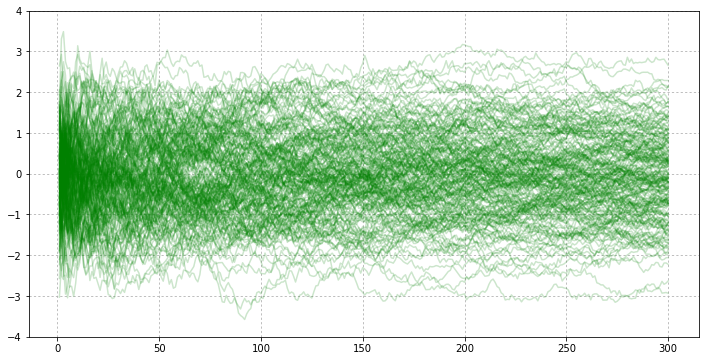

In [1223]:
cnt_samples = 200
n = 300
theta = 0
samples = sps.norm.rvs(size=(cnt_samples, n))
theta_jn = np.cumsum(samples, axis=1) / np.arange(1, n + 1)
T_jn = np.sqrt(np.arange(1, n + 1)) * (theta_jn - theta)
plt.figure(figsize=(12, 6))
for j in range(cnt_samples):
    plt.plot(np.arange(1, n + 1), T_jn[j], alpha=0.2, color='g')
plt.ylim((-4, 4))
plt.grid(ls=':')
plt.show()

$T_{jn}$ не очень-то куда-то сходится, но это и правильно. По ЦПТ, $\sqrt{n} (\theta^{*}_{n} - \theta) \overset{\text{d}}{\to} \xi \sim \mathcal{N}(0, 1)$.

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

In [1224]:
from sklearn.neighbors import KernelDensity

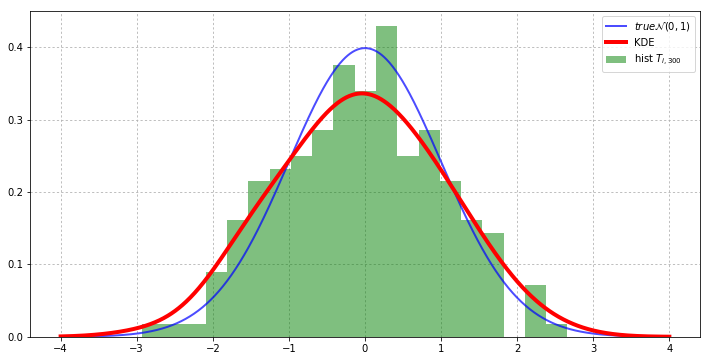

In [1225]:
T_sample = T_jn[:, -1]
x = np.linspace(-4, 4, 1000)
kernel_density = KernelDensity(kernel='gaussian', bandwidth=0.5)
kernel_density.fit(T_sample[:, np.newaxis])
plt.figure(figsize=(12, 6))
plt.axes(axisbelow=True)
plt.hist(T_sample, bins=20, normed=True, alpha=0.5, color='g', label='hist $T_{i,300}$')
plt.plot(x, sps.norm.pdf(x), color='b', linewidth=2, alpha=0.7, 
         label='$true \\mathcal{N}(0, 1)$',)
plt.plot(x, np.exp(kernel_density.score_samples(x[:, np.newaxis])), 
         linewidth=4, color='r', label='KDE')
plt.legend()
plt.grid(ls=':')
plt.show()

Действильно: $T_{jn}$ должно всё более и более походить на стандартное нормальное распределение

b)

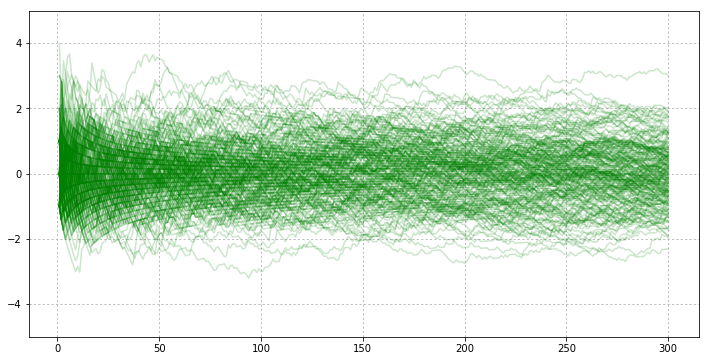

In [1230]:
cnt_samples = 200
n = 300
theta = 1
samples = sps.poisson(mu=theta).rvs(size=(cnt_samples, n))
theta_jn = np.cumsum(samples, axis=1) / np.arange(1, n + 1)
T_jn = np.sqrt(np.arange(1, n + 1)) * (theta_jn - theta)
plt.figure(figsize=(12, 6))
for j in range(cnt_samples):
    plt.plot(np.arange(1, n + 1), T_jn[j], alpha=0.2, color='g')
plt.ylim((-5, 5))
plt.grid(ls=':')
plt.show()

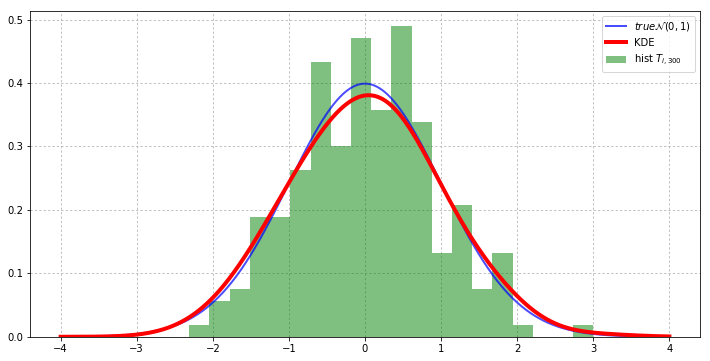

In [1231]:
T_sample = T_jn[:, -1]
x = np.linspace(-4, 4, 1000)
kernel_density = KernelDensity(kernel='gaussian', bandwidth=0.5)
kernel_density.fit(T_sample[:, np.newaxis])
plt.figure(figsize=(12, 6))
plt.axes(axisbelow=True)
plt.hist(T_sample, bins=20, normed=True, alpha=0.5, color='g', label='hist $T_{i,300}$')
plt.plot(x, sps.norm.pdf(x, scale=theta**0.5), color='b', 
         linewidth=2, alpha=0.7, label='$true \\mathcal{N}(0, 1)$',)
plt.plot(x, np.exp(kernel_density.score_samples(x[:, np.newaxis])), 
         linewidth=4, color='r', label='KDE')
plt.legend()
plt.grid(ls=':')
plt.show()

** Вывод: ** Для доказательства асимптотической нормальности можно пользоваться ЦПТ как в примере выше.
Асимптотическая нормальность оценки $\theta^{*}_{n}$ говорит о том, что при больших $n$ выборка из $\sqrt{n}(\theta^{*}_{n} - \theta)$ все больше похожа на выборку из нормального распределения. На экспериментах и особенно на графичках с гистограммами мы в этом убедились!:)

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Проведите исследование, аналогичное заданию 3 для $\theta=1$.

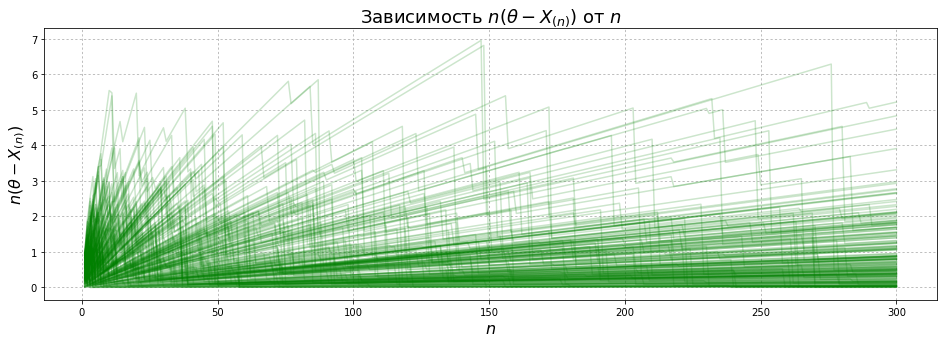

In [1234]:
cnt_samples = 200
n = 300
theta = 1
samples = sps.uniform.rvs(size=(cnt_samples, n))
estim = (theta - np.maximum.accumulate(samples, axis=1)) * np.arange(1, n + 1)
plt.figure(figsize=(16, 5))
for j in range(cnt_samples):
    plt.plot(np.arange(1, n + 1), estim[j], alpha=0.2, color='g')
plt.ylabel("$n(\\theta - X_{(n)})$", fontsize=16)
plt.xlabel("$n$", fontsize=16)
plt.title("Зависимость $n(\\theta - X_{(n)})$ от $n$", fontsize=18)
plt.grid(ls=':')
plt.show()

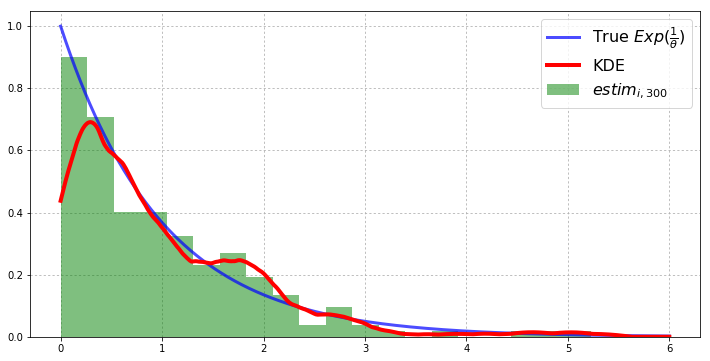

In [1237]:
x = np.linspace(0, 6, 1000)
kernel_density = KernelDensity(kernel='epanechnikov', bandwidth=0.4)
kernel_density.fit(estim[:, -1][:, np.newaxis])
plt.figure(figsize=(12, 6))
plt.axes(axisbelow=True)
plt.hist(estim[:, -1], bins=20, alpha=0.5, color='g', normed=True, 
         label='$estim_{i, 300}$')
plt.plot(x, sps.expon(scale=1/theta).pdf(x), alpha=0.7, linewidth=3, color='b', 
         label='True $Exp(\\frac{1}{\\theta})$')
plt.plot(x, np.exp(kernel_density.score_samples(x[:, np.newaxis])), 
         linewidth=4, color='r', label='KDE')
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод: ** 
Аналогично, получили практические подтверждения теоретических гипотез:)

**Задача 5.** Дана параметрическая модель и несколько выборок из двух или трех наблюдений (для удобства они даются в виде python-кода). Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

Выполнить задание, не создавая много кода, поможет следующая функция.

In [1238]:
def draw_likelihood(density_function, grid, samples, label):
    ''' density_function --- функция, считающая плотность (обычную или дискретную)
        grid --- сетка для построения графика
        samples --- три выборки
        label --- latex-код параметрической модели
    '''
    
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)
        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

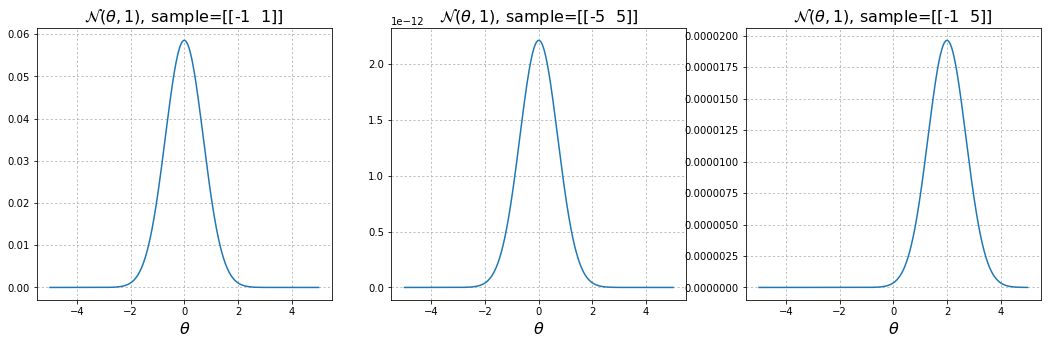

In [1239]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

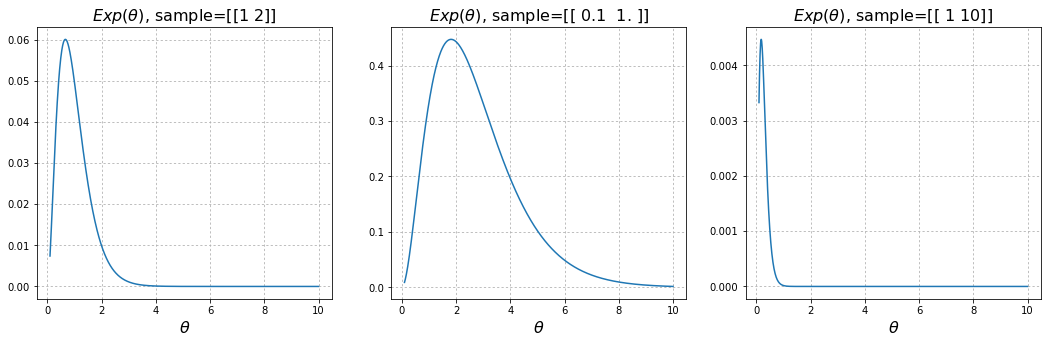

In [1240]:
grid = np.linspace(0.1, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1/grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

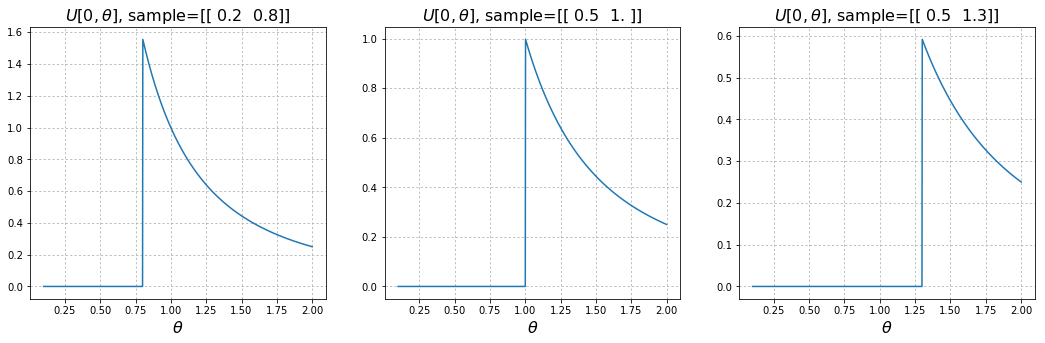

In [1241]:
grid = np.linspace(0.1, 2, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(scale=grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$')

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

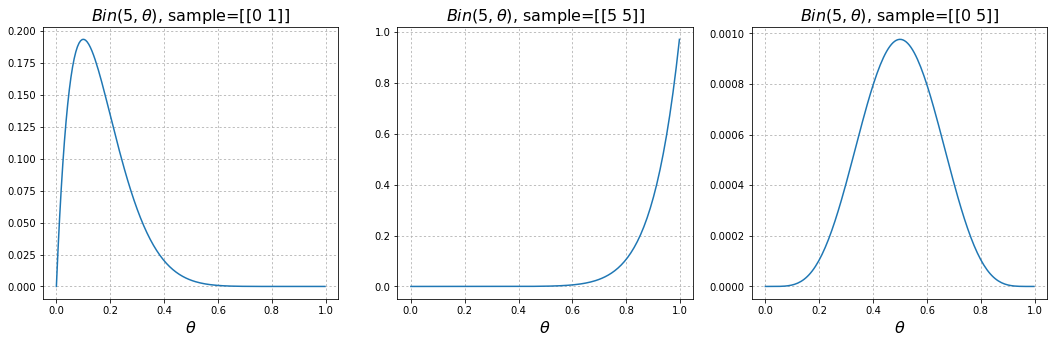

In [1242]:
grid = np.linspace(0, 6, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5, p=grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

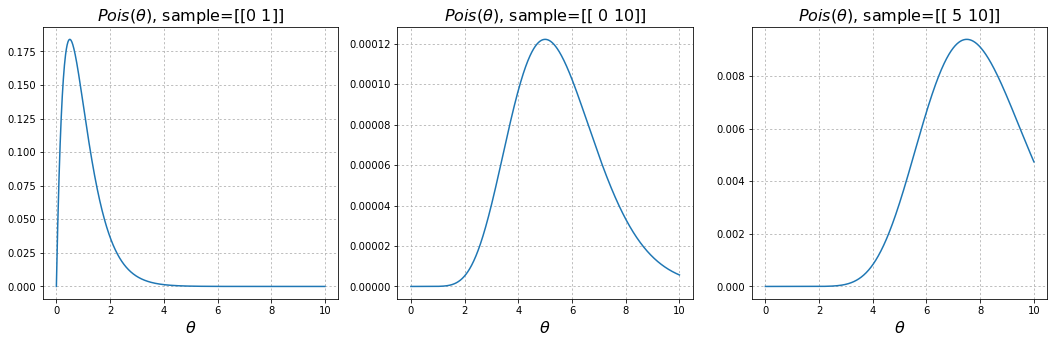

In [1243]:
grid = np.linspace(0, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

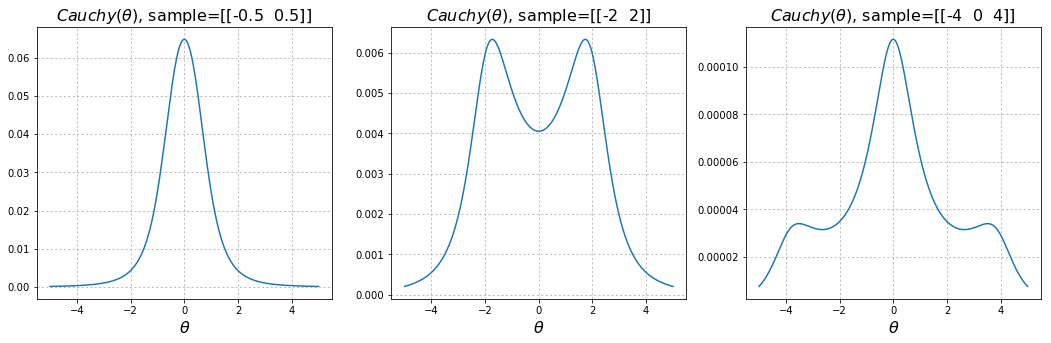

In [1283]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Сauchy(\\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** Функция правдоподобия показывает, насколько хороши все возможные оценки параметра $\theta$ при фиксированной выборке (чем больше значение в точке $\theta$, тем более правдоподобен именно такой исход) именно в этом и заключается ее название (берем выборку, считаем для нее функцию правдоподия, которая зависит только от теты). Функция правдоподобия зависит только от параметра, но никак не от выборки, поэтому она не является плотностью

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже

In [1245]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчтета оценки максимального правдоподобия? Реализуйте это. *Подсказка:* нужно использовать некоторую функцию у класса, который реализует это распределения.

Требуется посчитать лограифм функции правдоподобия

In [1284]:
sample = sps.norm.rvs(size=10**5)
likelihood = np.sum(sps.norm.logpdf(sample))
print(likelihood)

-141867.361709


**Задача 6.** 
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости.
Известно, что $X_i$ имеет распределение Коши.

*a).* На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

*b).* Сгенерируйте выборку размера 100 из стандартного распределения Коши. Для всех $n \leqslant 100$ по первым $n$ элементам выборки посчитайте значения $\overline{X}$ и $\widehat{\mu}$ (выборочное среднее и выборочная медиана). На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

a)

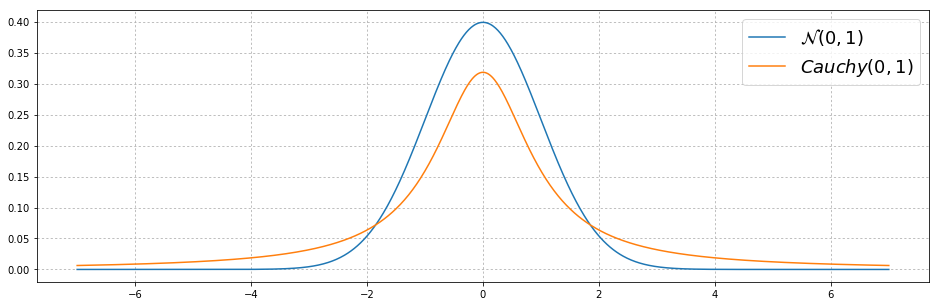

In [1285]:
grid = np.linspace(-7, 7, 1000)
plt.figure(figsize=(16, 5))
plt.plot(grid, sps.norm.pdf(grid), label='$\\mathcal{N}(0, 1)$')
plt.plot(grid, sps.cauchy.pdf(grid), label='$Cauchy(0, 1)$')
plt.legend(fontsize=18)
plt.grid(ls=':')
plt.show()

b)

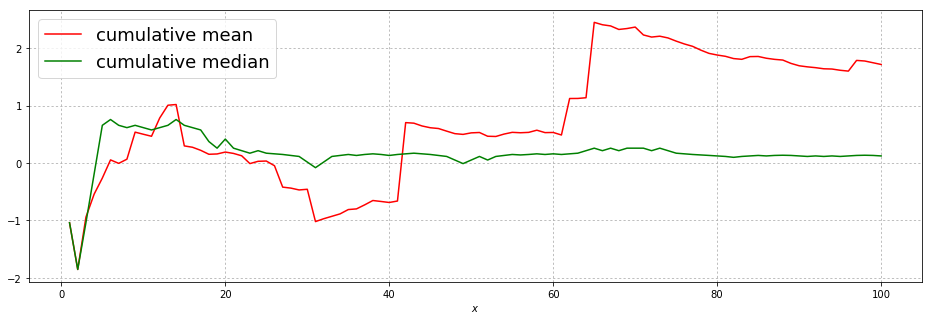

In [1280]:
n = 100
n_arr = np.arange(1, n + 1)
sample = sps.cauchy.rvs(size=n)
cummean_arr = np.cumsum(sample) / n_arr
cummedian_arr = np.array([np.median(sample[:i]) for i in n_arr])
plt.figure(figsize=(16, 5))
plt.plot(n_arr, cummean_arr, 'r', label='cumulative mean')
plt.plot(n_arr, cummedian_arr, 'g', label='cumulative median')
plt.legend(loc='best', fontsize=18)
plt.xlabel('$x$')
plt.grid(ls=':')
plt.show()

**Вывод: ** Распределение Коши имеет большие хвосты, поэтому брать стрднее значиение по выборке для оценки параметра не есть хорошо, т.к. срднее значение плохо воспринимает выбросы (значения на хвостах). Эту проблему может решить медиана

**Задача 7.** На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако, их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенераторы сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$$
где $\theta = (k, \lambda)$ --- двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится. В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

*Выборка.* Создайте выборку по значению скорости ветра для некоторой местности для не менее чем 100 дней. Помочь в этом может <a href="https://www.gismeteo.ru/diary/">дневник погоды</a>. Однако, данные там округлены до целого, поэтому вы можете попробовать найти другие данные.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

За распределение Вейбулла отвечает класс `weibull_min` из `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

Двумерную сетку можно создать с помощью `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, а потом сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать четырехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [1249]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Было лень парсить все это, поэтому тут ctrl+c, ctrl+v с сайта http://www.atlas-yakutia.ru/weather/wind/climate_russia-III_wind.html . (Не кода, а данных:)  )

In [1250]:
wind_speed = [
    2.2, 3.3, 1.1, 0.8, 2.7, 2.8, 3.4, 3.6, 3.9, 2.2, 1.9, 2.4, 3.3, 2.2, 1.1, 
    1.9, 0.6, 2.2, 1.9, 2.5, 1.7, 1.9, 1.1, 1.9, 3.1, 1.7, 1.0, 2.9, 2.8, 4.7, 
    3.1, 2.4, 1.9, 2.8, 3.1, 2.8, 4.7, 3.1, 3.1, 4.6, 4.4, 1.2, 3.6, 5.8, 6.4, 
    4.1, 2.2, 2.9, 1.7, 1.5, 1.5, 1.1, 3.1, 3.6, 3.9, 3.6, 3.4, 2.9, 3.2, 0.5,
    1.0, 2.5, 3.6, 5.5, 5.0, 3.9, 1.1, 2.2, 2.2, 4.1, 1.9, 3.6, 5.8, 6.2, 3.2, 
    2.5, 1.4, 0.1, 2.2, 3.6, 4.7, 5.8, 4.4, 3.6, 4.1, 4.4, 3.2, 2.4, 1.7, 1.7, 
    2.9, 3.2, 0.7, 1.0, 1.9, 3.1, 4.4, 3.3, 1.4, 0.1, 2.5, 2.9, 0.7, 2.2, 7.5, 
    6.9, 4.7, 1.7, 4.1, 1.4, 1.5, 2.4, 1.7, 2.4, 2.8, 3.3, 2.7, 3.6, 2.2, 2.8,
    2.5, 2.4, 2.4, 3.3, 1.2, 3.0, 3.2, 3.6, 2.2, 2.2, 2.9, 3.6, 1.9, 1.2, 2.4, 
    1.4, 1.5, 1.2, 2.2, 1.2, 3.3, 2.2, 2.8, 3.3, 1.0, 1.2, 2.7, 2.2
]

In [1251]:
def grid_search(X, Y):
    x_best, y_best = cool_argmax(np.array(
        list(map(lambda x: np.sum(sps.weibull_min.logpdf(x=wind_speed, c=x[0], scale=x[1])), 
                 np.hstack([X.reshape(np.prod(X.shape), 1), 
                            Y.reshape(np.prod(Y.shape), 1)])))).reshape(X.shape))
    return (X[x_best, y_best], Y[x_best, y_best])

In [1252]:
%time
X, Y = np.mgrid[0.00001:np.max(wind_speed):10e-3, 0.00001:np.max(wind_speed):10e-3]
grid_c, grid_scale = grid_search(X, Y)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.01 µs


In [1253]:
%time
X, Y = np.mgrid[grid_c - 10e-3:grid_c + 10e-3:10e-5, 
                grid_scale - 10e-3:grid_scale + 10e-3:10e-5]
grid_c, grid_scale = grid_search(X, Y)
print("c = ", grid_c, "scale = ", grid_scale)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 5.01 µs
c =  2.10701 scale =  3.08161


Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

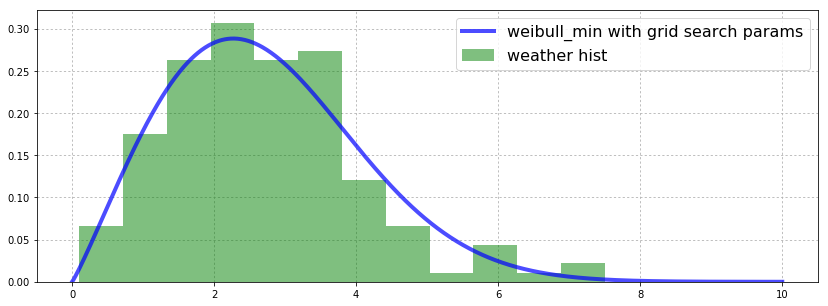

In [1254]:
x = np.linspace(0, 10, 1000)
y = sps.weibull_min(c=grid_c, scale=grid_scale).pdf(x)
plt.figure(figsize=(14, 5))
plt.axes(axisbelow=True)
plt.plot(x, y, linewidth=4, color='b', alpha=0.7, 
         label='weibull_min with grid search params')
plt.hist(wind_speed, bins=12, normed=True, color='g', 
         alpha=0.5, label='weather hist')
plt.grid(ls=':')
plt.legend(fontsize=16)
plt.show()

**Вывод: ** На реальных данных скорости ветра получили, что эта скорость действительно моделируется распределением Вейбулла. Получили приближенную ОМП этого распределения с помощью поиска по сетке.

*b).*<font size="5" color="red">\*</font> На самом деле, при помощи дифференцирования можно перейти к задаче поиска ОМП для параметра $k$. Выполните такое преобразование и найдите ОМП приближенно с помощью метода Ньютона, основываясь на параграфе 35 книги А.А. Боровкова "Математическая статистика", 2007.

Найдем первую и вторую производные логарифма функции правдоподобия

In [1258]:
wind_speed = np.array(wind_speed)
first_deriv = lambda k: np.sum(1/k + np.log(wind_speed) - np.log(grid_scale) - \
                               (wind_speed/grid_scale)**k * np.log(wind_speed/grid_scale))
second_deriv = lambda k: np.sum(-1/k**2  - (wind_speed/grid_scale)**k * \
                                np.log(wind_speed/grid_scale)**2)

Далее нам нужно найти нули производной логарфма функции правдоподобия. Воспользуемся методом Ньютона

http://www.machinelearning.ru/wiki/index.php?title=Метод_касательных_%28Ньютона-Рафсона%29

$F^{'}(\theta) = 0 \Rightarrow $ (по методу Ньютона)
$\theta^*_{n+1} = \theta^*_{n} - \frac{F^{'}(\theta^*_{n})}{F^{''}(\theta^*_{n})}$

где $\lim_{n \to \infty} F^{'}(\theta^*_{n}) = 0$

т.е. $\theta^*_{n}$ -- приближенное значение ОМП для $\theta$

таким методом найдем значение параметра  $k$:

In [1259]:
eps = 10e-5
last_theta, now_theta = 10e-2, 2
iteration = 0
while np.abs(now_theta - last_theta) > eps:
    last_theta = now_theta
    now_theta = last_theta - first_deriv(last_theta) / second_deriv(last_theta)
    iteration += 1
    print('iteration:', iteration, '\n', 'last theta =', last_theta, '\n',
         'now theta =', now_theta, '\n', 'delta =', np.abs(now_theta - last_theta), '\n')
print("\nBEST THETA =", now_theta)

iteration: 1 
 last theta = 2 
 now theta = 2.10488712938 
 delta = 0.104887129381 

iteration: 2 
 last theta = 2.10488712938 
 now theta = 2.10701629097 
 delta = 0.00212916158447 

iteration: 3 
 last theta = 2.10701629097 
 now theta = 2.10701700612 
 delta = 7.15151796005e-07 


BEST THETA = 2.10701700612


Теперь из полученного значения $k$ нам достаточно легко восстановить параметр $\lambda$. Продифференцируем логарифм функции правдоподобия по $\lambda$:

получим ОМП: $ \lambda^{*} = \left( \overline{X^{k} } \right)^{ \frac{1}{k} } $

In [1260]:
lambda_estimator = lambda k: np.mean(wind_speed**k)**(1/k)
now_lambda = lambda_estimator(now_theta)

#### сравним оценки, полученные с помощью метода Ньютона с оценками, полученными с помощью поиска по сетке

In [1261]:
print("манхеттенское отклонение параметра $k$ =", np.abs(now_theta - grid_c))
print("манхеттенское отклонение параметра $\\lambda$ =", np.abs(now_lambda - grid_scale))

манхеттенское отклонение параметра $k$ = 7.00611713045e-06
манхеттенское отклонение параметра $\lambda$ = 4.64900390451e-05


**Задача 8.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом 0.01 сгенерируйте 2000 выборок $X_1^j, ..., X_{100}^j$ из распределения $U[0, \theta]$. По каждой из этих выборок посчитайте значение всех четырех оценок. Тем самым для данного $\theta$ и оценки $\theta^*$ получится 2000 реализаций этой оценки $\theta^*_1, ..., \theta^*_{2000}$, где значение $\theta^*_j$ посчитано по реализации выборки $X_1^j, ..., X_{100}^j$. Теперь можно оценить функцию потерь этой оценки с помощью усреднения
$$\widehat{R}\left(\theta^*, \theta\right) = \frac{1}{2000}\sum\limits_{j=1}^{2000} g\left(\theta^*_j, \theta\right),$$
где $g(x, y)=(x-y)^2$ и $g(x, y)=\left|x-y\right|$.

Нанесите на один график все четыре функции риска. Для каждого типа функции потерь должен быть свой график. Пользуйтесь следующим шаблоном. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

In [1286]:
estimators = np.array([
    (lambda X, n: 2 * np.mean(X, axis=1), '$2\overline{X}$', 'b'),
    (lambda X, n: (n + 1) * np.min(X, axis=1), '$(n + 1)X_{(1)}$', 'y'),
    (lambda X, n: np.min(X, axis=1) + np.max(X, axis=1), '$X_{(1)} + X_{(n)}$', 'g'),
    (lambda X, n: (n + 1) / n * np.max(X, axis=1), '$\\frac{n + 1}{n}X_{(n)}$', 'r')
])
risk_functions = np.array([
    (lambda estimator, true_value: (estimator - true_value) ** 2, 
     '$g(x, y)=(x-y)^2$', (0, 0.004)),
    (lambda estimator, true_value: np.abs(estimator - true_value), 
     '$g(x, y)=\\left|x-y\\right|$', (0, 0.04))
])
theta_arr = [2 - i * 0.01 for i in range(200)]

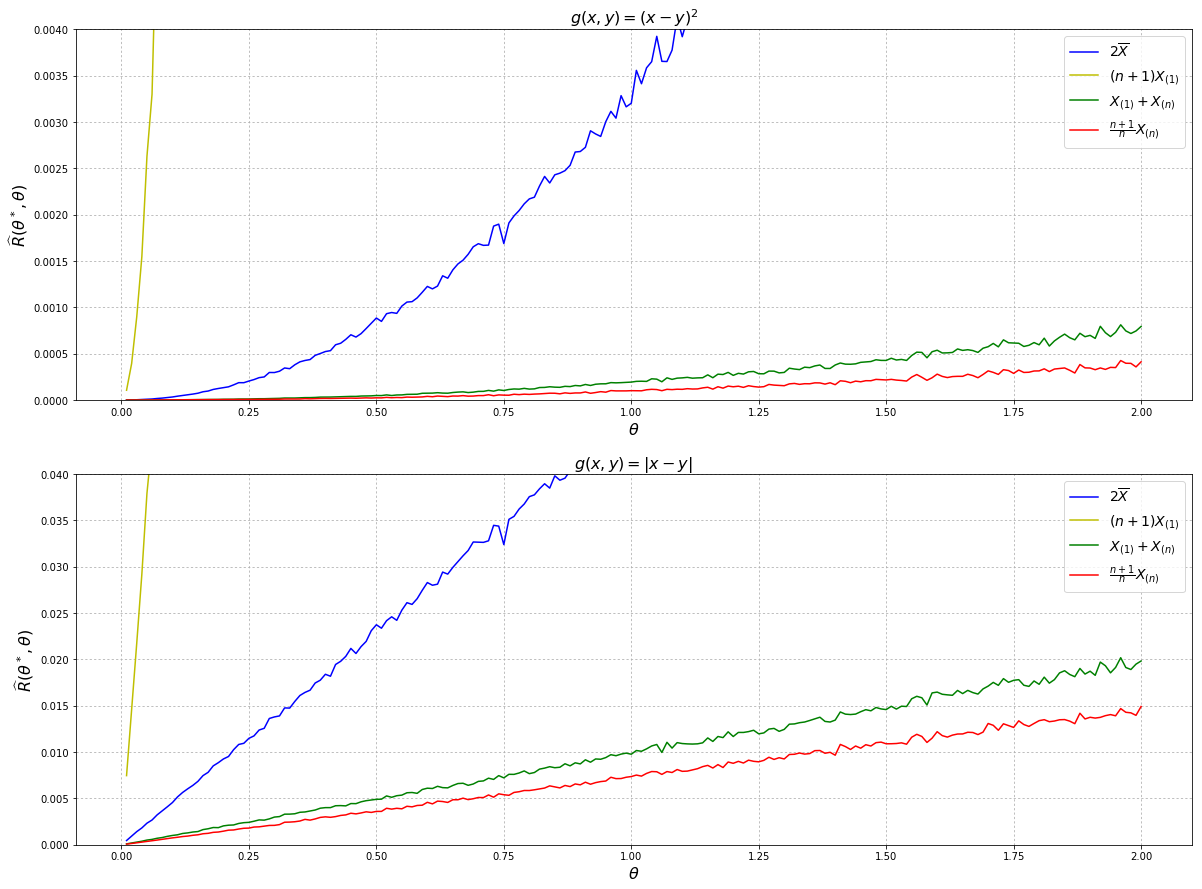

In [1287]:
plt.figure(figsize=(20, 15))
array_estimators = []
for theta in theta_arr:
    samples = sps.uniform(scale=theta).rvs(size=(2000, 100))
    theta_estimators = []
    for estimator in estimators[:, 0]:
        theta_estimators.append(list(map(lambda risk_function: 
                                         np.mean(risk_function(estimator(samples, 100), theta)), 
                                         risk_functions[:, 0])))
    array_estimators.append(theta_estimators)
    
array_estimators = np.array(array_estimators)
for i, risk_function_config in enumerate(risk_functions[:, 1:]):
    label_risk_function, ylim = risk_function_config
    plt.subplot(2, 1, i + 1)
    for j, estimator_config in enumerate(estimators[:, 1:]):
        est_label, est_color = estimator_config
        plt.plot(theta_arr, array_estimators[:, j, i], label=est_label, color=est_color)
    plt.xlabel('$\\theta$', fontsize=16)
    plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
    plt.ylim(ylim)
    plt.legend(fontsize=14)
    plt.grid(ls=':')
    plt.title(label_risk_function, fontsize=16)
plt.show()

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод: **
таким образом, оценка $\frac{n + 1}{n}X_{(n)}$ лучше во всех двух подходах, что мы и проверили в теоретическом дз:)

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Для $1 \leqslant k \leqslant 5$ рассмотрим оценки $\left(k! / \overline{X^k}\right)^{1/k}$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не размножать код. Факториалы есть гамма-функция, которая реализована в `scipy.special.gamma`.

In [1267]:
estimator = lambda X, k: (sp.special.gamma(k + 1) / np.mean(X ** k, axis=1)) ** (1 / k)
risk_functions = np.array([
    (lambda estimator, true_value: (estimator - true_value) ** 2, 
     '$g(x, y)=(x-y)^2$', (0, 0.1)),
    (lambda estimator, true_value: np.abs(estimator - true_value), 
     '$g(x, y)=\\left|x-y\\right|$', (0, 0.1))
])
theta_arr = np.linspace(0.01, 2, 100)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


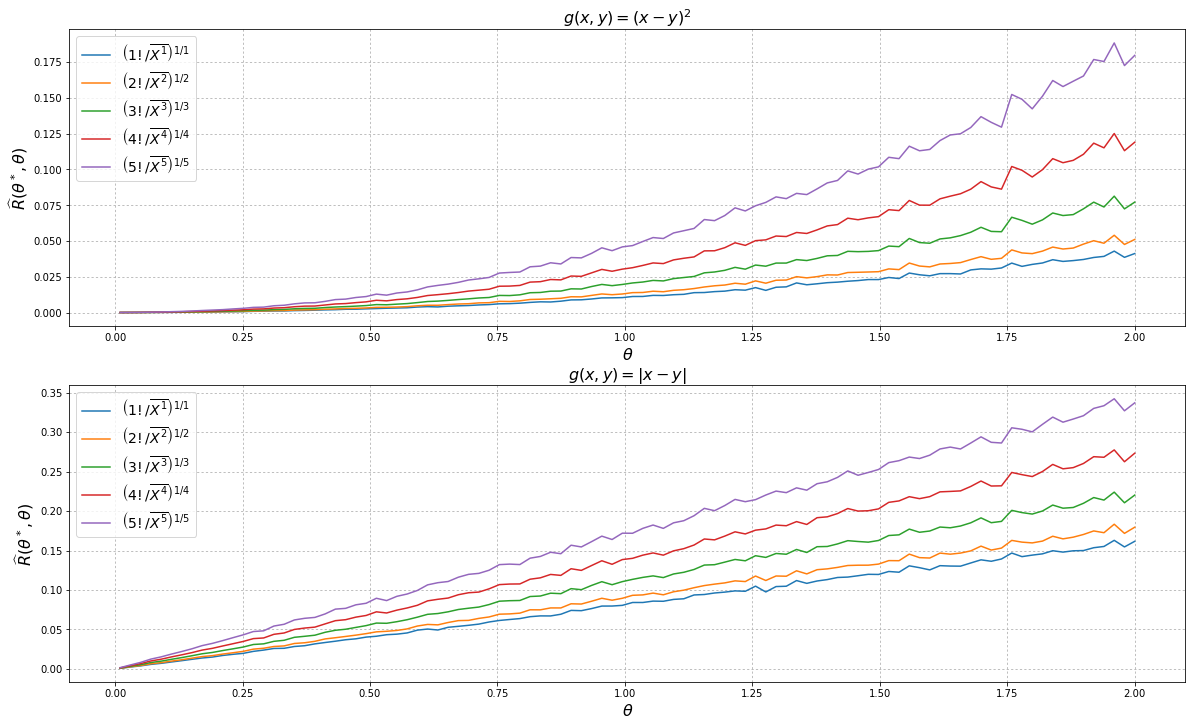

In [1269]:
%time
plt.figure(figsize=(20, 12))
array_estimators = []
for theta in theta_arr:
    samples = sps.expon(scale=1/theta).rvs(size=(2000, 100))
    theta_estimators = []
    for k in range(1, 6):
        theta_estimators.append(list(map(lambda risk_function: 
                                         np.mean(risk_function(estimator(samples, k), theta)), 
                                         risk_functions[:, 0])))
    array_estimators.append(theta_estimators)
    
array_estimators = np.array(array_estimators)

for i, risk_function_config in enumerate(risk_functions[:, 1:]):
    label_risk_function, ylim = risk_function_config
    plt.subplot(2, 1, i + 1)
    for k in range(1, array_estimators[:, :, i].shape[1] + 1):
        plt.plot(theta_arr, array_estimators[:, k-1, i], 
                 label='$\\left(%d! / \\overline{X^%d}\\right)^{1/%d}$'%(k, k, k))
    plt.xlabel('$\\theta$', fontsize=16)
    plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(ls=':')
    plt.title(label_risk_function, fontsize=16)
plt.show()

Таким образом оценка $\frac{1}{\overline{X}}$ лучше во всех двух подходах

**Задача 9<font size="5" color="red">\*</font>.** Пусть $\theta^*$ --- оценка параметра $\theta$ и $R\left(\theta^*, \theta\right) = \mathsf{E}_{\theta} \left(\theta^* - \theta\right)^2$ --- функция риска с квадратичной функцией потерь. Тогда справедливо bias-variance разложение
$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$$
$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta,$$
$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*.$$

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathscr{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок.

Плотность $p_{X_{(n)}} = \frac{nx^{n-1}}{\theta^n}$. Значит

$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta = \mathsf{E}_{\theta} cX_{(n)} - \theta = \frac{cn\theta}{n+1} - \theta = \theta \left(\frac{cn}{n+1} - 1\right)$


$ variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^* = \mathsf{D}_{\theta} cX_{(n)} = \mathsf{E}_{\theta} (cX_{(n)})^2 - (\mathsf{E}_{\theta} cX_{(n)})^2 = c^2 \int_{0}^{\theta} x^2 \frac{nx^{n-1}}{\theta^n} dx - \left(\int_0^\theta x\frac{cnx^{n-1}}{\theta^n} dx\right)^2 =$ 

$=\frac{c^2\theta^2n}{n+2} - \frac{c^2\theta^2n^2}{(n+1)^2} = \frac{c^2n}{(n+2)(n+1)^2}\theta^2$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отобажена информативная часть графика (по оси *x* примерно от 0.9 до 1.3). Не забудьте добавить сетку и легенду, а так же подписать оси.

Сделайте выводы. Какая $c$ дает минимум функции риска? Является ли соответствующая оценка смещеной? Что можно сказать про несмещенную оценку?

In [1270]:
def bias_est_theta(c, sample_size, theta):
    return c * sample_size / (sample_size + 1) * theta - theta

def variance_est_theta(c, sample_size, theta):
    return  theta ** 2 * c ** 2 * sample_size / ((sample_size + 1)** 2 * (sample_size + 2))

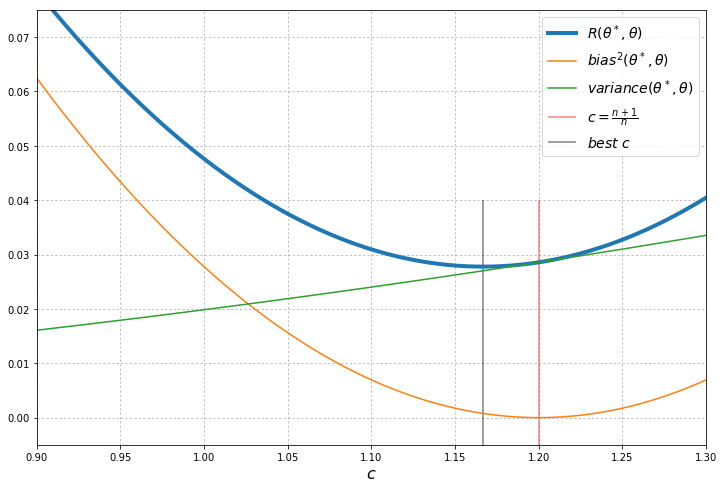

In [1271]:
n, theta = 5, 1
plt.figure(figsize=(12, 8))
c = np.linspace(0, 2, 5000)
R = bias_est_theta(c, n, theta)**2 + variance_est_theta(c, n, theta)
plt.plot(c, R, label='$R\\left(\\theta^*, \\theta\\right)$', linewidth=4)
plt.plot(c, bias_est_theta(c, n, theta)**2, label='$bias^2(\\theta^*, \\theta)$')
plt.plot(c, variance_est_theta(c, n, theta), label='$variance(\\theta^*, \\theta)$')
plt.xlim((0.9, 1.3))
plt.ylim((-0.005, 0.075))
plt.xlabel('$c$', fontsize=16)
plt.vlines((n + 1)/ n, -0.005, 0.04, color='r', alpha=0.5, label='$c = \\frac{n+1}{n} $')
plt.vlines(c[np.argmin(R)], -0.005, 0.04, color='black', alpha=0.5, label='$best$ $c$')
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

In [1272]:
print("best c =", c[np.argmin(R)])

best c = 1.16663332667


*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathscr{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок. Можно использовать то, что величина $\frac{nS^2}{\sigma^2}$ имеет распределение хи-квадрат с $n-1$ степенью свободы (это будет доказано в нашем курсе позже) и ее дисперсия равна $2(n-1)$.

Заметим, что $\frac{c}{n}\mathsf{E}_{\theta} \theta^* = \mathsf{E}_{\theta} \frac{c}{n} \frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2 = \mathsf{E}_{\theta} S^2 = \frac{n-1}{n} \sigma^2 \Rightarrow \mathsf{E}_{\theta} \theta^* = \frac{n - 1}{c}\sigma^2$

Значит, $bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta = \sigma^2\left(\frac{n - 1}{c} - 1\right)$

Знаем, что 

1) $\mathsf{D}_{\theta} \frac{nS^2}{\sigma^2} = 2(n - 1) \Rightarrow \mathsf{D}_{\theta} S^2 = \frac{2(n - 1)\sigma^4}{n^2}$

2) $variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^* = \frac{n^2}{c^2} \mathsf{D}_{\theta} S^2 = \frac{2(n - 1)\sigma^4}{c^2}$


In [1273]:
def bias_est_theta(c, sample_size, theta):
    return theta * ((sample_size - 1) / c - 1)

def variance_est_theta(c, sample_size, theta):
    return  2 * (sample_size - 1) * theta ** 2  / c ** 2

Повторите исследование, аналогичное пункту *a)* для $sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

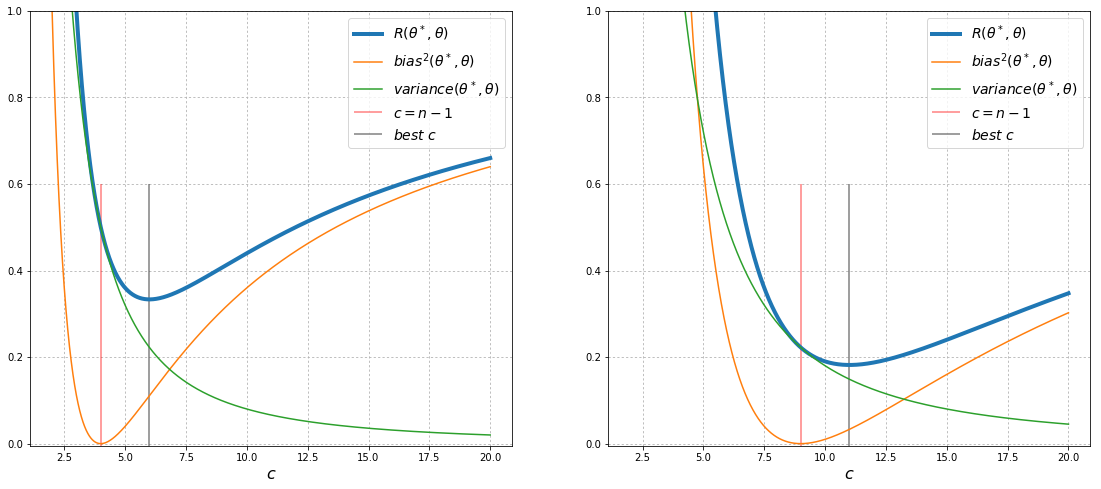

In [1274]:
theta = 1
n_arr = [5, 10]
plt.figure(figsize=(19, 8))
c = np.linspace(2, 20, 5000)
best_c = []
for i, n in enumerate(n_arr):
    plt.subplot(1, 2, i + 1)
    R = bias_est_theta(c, n, theta)**2 + variance_est_theta(c, n, theta)
    best_c.append(c[np.argmin(R)])
    plt.plot(c, R, label='$R\\left(\\theta^*, \\theta\\right)$', linewidth=4)
    plt.plot(c, bias_est_theta(c, n, theta)**2, label='$bias^2(\\theta^*, \\theta)$')
    plt.plot(c, variance_est_theta(c, n, theta), label='$variance(\\theta^*, \\theta)$')
    plt.ylim((-0.005, 1))
    plt.xlabel('$c$', fontsize=16)
    plt.vlines(n - 1, -0.005, 0.6, color='r', alpha=0.5, label='$c = n - 1$')
    plt.vlines(c[np.argmin(R)], -0.005, 0.6, color='black', alpha=0.5, label='$best$ $c$')
    plt.legend(fontsize=14, loc=1)
    plt.grid(ls=':')
plt.show()

In [1275]:
for n, c in zip(n_arr, best_c):
    print("n = %d, best c = %f"%(n, c))

n = 5, best c = 6.000400
n = 10, best c = 11.001800


** Вывод: ** (оценка с минимальной функцией риска и несмещенная оценка отмечены на графике). Минимальную функцию риска дает смещенная оценка, т.к. компонента ее $bias$-разложения не нулевая. Несмещенная оценка имеет $bias$ компоненту равную 0 (из определения несмещенности), но вот $variance$ компонента ее совсем не минимальна

**Задача 10<font size="5" color="red">\*</font>.** Разберитесь с теорией параграфа 4 главы 6 книжки М.Б. Лагутина "Наглядная математическая статистика", 2009. Проведите соответствующее исследование.

In [1091]:
Hodges_Lehmann_estimator = lambda X, n: np.mean(X, axis=1) + 1 /(1 + n**0.5) * \ 
                                        (1 / 2 - np.mean(X, axis=1))
mean_estimator = lambda X: np.mean(X, axis=1)
risk_function = lambda estimator, true_value: (estimator - true_value) ** 2

theta =  0.936654587712494


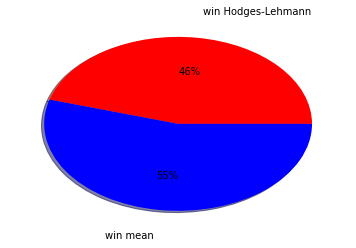

In [1298]:
n = 9
n_samples = 5000
theta_true = random.uniform(0, 1)
samples = sps.bernoulli(p=theta_true).rvs(size=(n_samples, n))
win_Hodges_Lehmann = (risk_function(Hodges_Lehmann_estimator(samples, n), theta_true) \
                      - risk_function(mean_estimator(samples), theta_true)) > 0
print("theta = ", theta_true)
plt.pie([np.sum(win_Hodges_Lehmann), 
        len(win_Hodges_Lehmann) - np.sum(win_Hodges_Lehmann)], 
        labels=['win Hodges-Lehmann', 'win mean'],
        explode=[0, 0], autopct='%1.0f%%', shadow=True, labeldistance=1.3, 
        colors=['r', 'b']);

сделаем для всех $\theta \in (0, 1)$

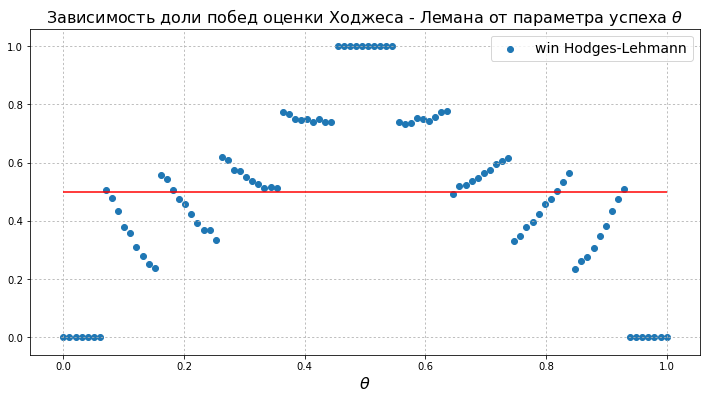

In [1302]:
n = 9
n_samples = 5000
theta_true_arr = np.linspace(0, 1, 100)
win_Hodges_Lehmann = []
for theta_true in theta_true_arr:
    samples = sps.bernoulli(p=theta_true).rvs(size=(n_samples, n))
    win_Hodges_Lehmann.append(np.sum((risk_function(
        Hodges_Lehmann_estimator(samples, n), theta_true) - 
                                      risk_function(mean_estimator(samples), 
                                                    theta_true)) < 0))

plt.figure(figsize=(12, 6))
plt.scatter(theta_true_arr, np.array(win_Hodges_Lehmann) / n_samples, 
            label='win Hodges-Lehmann')
plt.hlines(0.5, 0, 1, color='r')
plt.legend(fontsize=14)
plt.xlabel('$\\theta$', fontsize=16)
plt.title("Зaвисимость доли побед оценки Ходжеса - Лемана от параметра успеха $\\theta$", 
          fontsize=16)
plt.grid(ls=':')

**Вывод: ** поняли, что для Бернуллиевского распределения оценка вероятности "успеха" не такая уж и простая. Выбор оценки параметра будет зависеть от примерного значения этого параметра. Если у нас есть знание о примерных интервалах значения вероятности "успеха", то мы можем воспользоваться им и выбрать наиболее оптимальную оценку из графика выше